# **Model Non-Pretrained (Multilayer Perceptron/MLP Model)**

In [28]:
# Importing necessary libraries
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
import joblib

In [6]:
from google.colab import files
import pandas as pd

# Upload the CSV file
uploaded = files.upload()

# After uploading, use pandas to read the CSV file
for filename in uploaded.keys():
    # Reading the uploaded CSV file into a pandas DataFrame
    df = pd.read_csv(filename)

# Display the first 5 rows of the dataset
print("First 5 records:")
print(df.head())

Saving customer_churn_business_dataset.csv to customer_churn_business_dataset.csv
First 5 records:
  customer_id  gender  age     country      city customer_segment  \
0  CUST_00001    Male   68  Bangladesh    London              SME   
1  CUST_00002  Female   57      Canada    Sydney       Individual   
2  CUST_00003    Male   24     Germany  New York              SME   
3  CUST_00004    Male   49   Australia     Dhaka       Individual   
4  CUST_00005    Male   65  Bangladesh     Delhi       Individual   

   tenure_months signup_channel contract_type  monthly_logins  ...  \
0             22            Web       Monthly              26  ...   
1              9         Mobile       Monthly               7  ...   
2             58            Web        Yearly              19  ...   
3             19         Mobile        Yearly              34  ...   
4             52            Web       Monthly              20  ...   

   avg_resolution_time  complaint_type  csat_score  escalations  

In [17]:
# ====================================================================
# Data Preprocessing
# ====================================================================

# Import necessary preprocessing functions
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

def preprocess_data(df):
    """Preprocess the data for modeling."""
    print("\nPreprocessing Data...")

    # Handling missing values (if any)
    df = df.dropna()  # Drop rows with missing values

    # Encode categorical variables
    label_encoders = {}
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if col != 'customer_id':  # Exclude customer_id column
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            label_encoders[col] = le

    # Features (X) and target (y)
    X = df.drop(columns=['customer_id', 'churn'], errors='ignore')  # Exclude customer_id and target column
    y = df['churn']  # Target variable

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

# Preprocess the data
X_train, X_test, y_train, y_test, scaler = preprocess_data(df)

# Check the dimensions of processed data
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


Preprocessing Data...
X_train shape: (6364, 30), X_test shape: (1591, 30)
y_train shape: (6364,), y_test shape: (1591,)


/tmp/ipython-input-2818665350.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col].astype(str))
/tmp/ipython-input-2818665350.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col].astype(str))
/tmp/ipython-input-2818665350.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [29]:
# ====================================================================
# MLP Model
# ====================================================================

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def build_mlp_model(input_dim):
    """Build the MLP model with improved regularization."""
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.5),  # Increased dropout

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),  # Increased dropout

        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),  # Increased dropout

        Dense(16, activation='relu'),
        Dropout(0.5),  # Increased dropout

        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    # Compile the model with a lower learning rate
    model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Build the model
model = build_mlp_model(X_train.shape[1])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,745 (61.50 KB)

 Trainable params: 15,297 (59.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [31]:
# ====================================================================
# Train the MLP Model
# ====================================================================
import tensorflow.keras as keras
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32,
                    callbacks=[early_stopping], verbose=1)

Epoch 1/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5673 - loss: 0.8973 - val_accuracy: 0.8008 - val_loss: 0.6037
Epoch 2/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6077 - loss: 0.8008 - val_accuracy: 0.8561 - val_loss: 0.5427
Epoch 3/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6760 - loss: 0.6738 - val_accuracy: 0.8781 - val_loss: 0.5045
Epoch 4/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6943 - loss: 0.6617 - val_accuracy: 0.8913 - val_loss: 0.4762
Epoch 5/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7477 - loss: 0.5730 - val_accuracy: 0.8969 - val_loss: 0.4552
Epoch 6/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7597 - loss: 0.5518 - val_accuracy: 0.8982 - val_loss: 0.4356
Epoch 7/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8006 - loss: 0.5236 - val_accuracy: 0.8982 - val_loss: 0.4198
Epoch 8/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8204 - loss: 0.4920 - val_

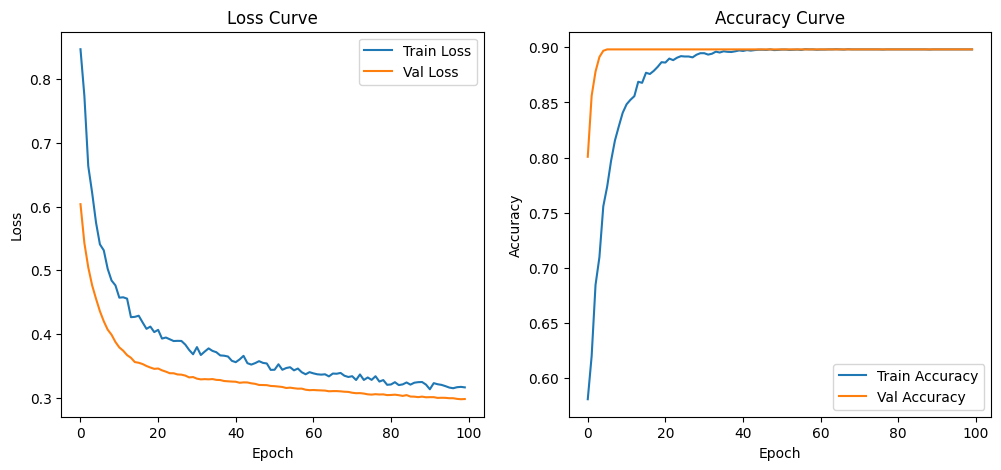

In [32]:
# Plot training loss and accuracy
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1429
           1       0.00      0.00      0.00       162

    accuracy                           0.90      1591
   macro avg       0.45      0.50      0.47      1591
weighted avg       0.81      0.90      0.85      1591



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


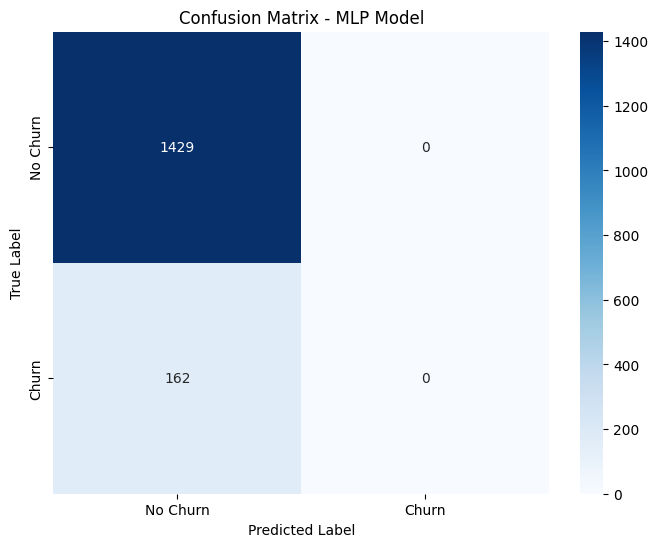

Accuracy: 0.8982

Example Predictions:
Predicted: 0 - Actual: 0
Predicted: 0 - Actual: 0
Predicted: 0 - Actual: 0
Predicted: 0 - Actual: 1
Predicted: 0 - Actual: 1


In [33]:
# ====================================================================
# Evaluate Model & Confusion Matrix
# ====================================================================
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def evaluate_model(model, X_test, y_test):
    """Evaluate model performance and plot confusion matrix."""
    # Predicting probabilities
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int).flatten()

    # Classification Report
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.title('Confusion Matrix - MLP Model')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Example predictions
    print("\nExample Predictions:")
    for i in range(5):  # Display first 5 predictions
        print(f"Predicted: {y_pred[i]} - Actual: {y_test.iloc[i]}")

    return accuracy

# Evaluate the MLP model
accuracy = evaluate_model(model, X_test, y_test)

In [34]:
import joblib

# ====================================================================
# Save Model and Scaler
# ====================================================================

def save_model(model, scaler):
    """Save the trained model and scaler."""
    model.save('mlp_model.h5')
    joblib.dump(scaler, 'scaler.pkl')
    print("✓ Model and scaler saved")

# Save the model and scaler
save_model(model, scaler)

✓ Model and scaler saved


# **Model PreTrain (TabNet Model)**

In [36]:
# Install pytorch_tabnet if not already installed
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.1 MB/s eta 0:00:00


In [37]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

from pytorch_tabnet.tab_model import TabNetClassifier

# Upload the CSV file
uploaded = files.upload()

# After uploading, use pandas to read the CSV file
for filename in uploaded.keys():
    # Reading the uploaded CSV file into a pandas DataFrame
    df = pd.read_csv(filename)

# Display the first 5 rows of the dataset
print("First 5 records:")
df.head()

Saving customer_churn_business_dataset.csv to customer_churn_business_dataset (1).csv
First 5 records:


,customer_id,gender,age,country,city,customer_segment,tenure_months,signup_channel,contract_type,monthly_logins,...,avg_resolution_time,complaint_type,csat_score,escalations,email_open_rate,marketing_click_rate,nps_score,survey_response,referral_count,churn
0,CUST_00001,Male,68,Bangladesh,London,SME,22,Web,Monthly,26,...,13.354360,Service,4.0,0,0.71,0.40,27,Satisfied,1,0
1,CUST_00002,Female,57,Canada,Sydney,Individual,9,Mobile,Monthly,7,...,25.140088,Billing,2.0,0,0.78,0.33,-19,Neutral,2,1
2,CUST_00003,Male,24,Germany,New York,SME,58,Web,Yearly,19,...,27.572928,Service,3.0,0,0.35,0.49,80,Neutral,1,0
3,CUST_00004,Male,49,Australia,Dhaka,Individual,19,Mobile,Yearly,34,...,26.420822,Technical,5.0,1,0.83,0.15,100,Neutral,0,0
4,CUST_00005,Male,65,Bangladesh,Delhi,Individual,52,Web,Monthly,20,...,26.674579,Technical,4.0,0,0.65,0.44,21,Unsatisfied,1,0


In [38]:
# ====================================================================
# Data Preprocessing
# ====================================================================

def preprocess_data(df):
    """Preprocess the data for modeling."""
    df = df.dropna()  # Drop rows with missing values

    label_encoders = {}
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if col != 'customer_id':  # Exclude customer_id column
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            label_encoders[col] = le

    X = df.drop(columns=['customer_id', 'churn'], errors='ignore')  # Exclude customer_id and target column
    y = df['churn']  # Target variable

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

# Preprocess the data
X_train, X_test, y_train, y_test, scaler = preprocess_data(df)

# Check the dimensions of processed data
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (6364, 30), X_test shape: (1591, 30)
y_train shape: (6364,), y_test shape: (1591,)


/tmp/ipython-input-3923044629.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col].astype(str))
/tmp/ipython-input-3923044629.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col].astype(str))
/tmp/ipython-input-3923044629.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [39]:
# ====================================================================
# TabNet Model
# ====================================================================

def build_tabnet_model(input_dim):
    """Build TabNet-inspired Model."""
    clf = TabNetClassifier(
        seed=42,
        verbose=1,
        device_name='cpu'
    )
    return clf

# Build the TabNet model
clf = build_tabnet_model(X_train.shape[1])

# ====================================================================
# Train the TabNet Model
# ====================================================================

clf.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_name=['train', 'valid'],
    max_epochs=100,
    patience=20,
    batch_size=256,
    virtual_batch_size=64
)

/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.40093 | train_auc: 0.55606 | valid_auc: 0.51207 |  0:00:01s
epoch 1  | loss: 0.33781 | train_auc: 0.59213 | valid_auc: 0.54823 |  0:00:02s
epoch 2  | loss: 0.32878 | train_auc: 0.58762 | valid_auc: 0.53443 |  0:00:03s
epoch 3  | loss: 0.32785 | train_auc: 0.64371 | valid_auc: 0.63801 |  0:00:04s
epoch 4  | loss: 0.31926 | train_auc: 0.66295 | valid_auc: 0.60858 |  0:00:06s
epoch 5  | loss: 0.31966 | train_auc: 0.6647  | valid_auc: 0.64115 |  0:00:07s
epoch 6  | loss: 0.31176 | train_auc: 0.7091  | valid_auc: 0.68479 |  0:00:08s
epoch 7  | loss: 0.30832 | train_auc: 0.70673 | valid_auc: 0.71698 |  0:00:09s
epoch 8  | loss: 0.30364 | train_auc: 0.73298 | valid_auc: 0.73323 |  0:00:10s
epoch 9  | loss: 0.30285 | train_auc: 0.70944 | valid_auc: 0.70717 |  0:00:11s
epoch 10 | loss: 0.30501 | train_auc: 0.72383 | valid_auc: 0.69533 |  0:00:12s
epoch 11 | loss: 0.30162 | train_auc: 0.7205  | valid_auc: 0.68841 |  0:00:13s
epoch 12 | loss: 0.30023 | train_auc: 0.73075 | vali

/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


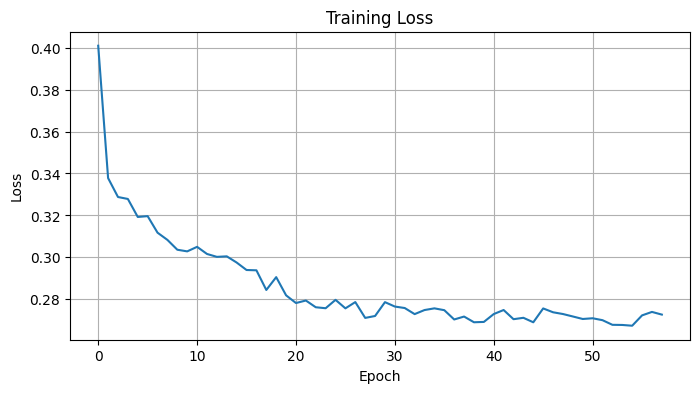

In [40]:
# Plot training loss
logs = clf.history['loss']
plt.figure(figsize=(8, 4))
plt.plot(logs)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.94      1429
           1       0.42      0.09      0.14       162

    accuracy                           0.90      1591
   macro avg       0.66      0.54      0.54      1591
weighted avg       0.86      0.90      0.86      1591



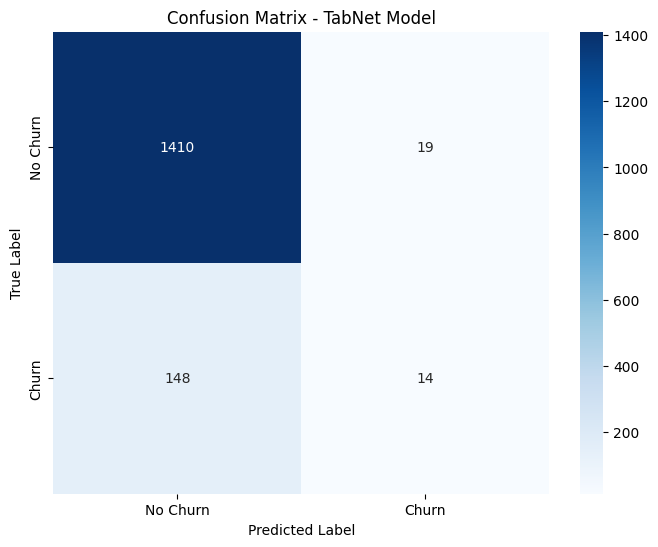

Accuracy: 0.8950

Example Predictions:
Predicted: 0 - Actual: 0
Predicted: 0 - Actual: 0
Predicted: 0 - Actual: 0
Predicted: 0 - Actual: 1
Predicted: 0 - Actual: 1


In [41]:
# ====================================================================
# Evaluate Model & Confusion Matrix
# ====================================================================

def evaluate_model(clf, X_test, y_test):
    """Evaluate model performance and plot confusion matrix."""
    y_pred = clf.predict(X_test)

    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.title('Confusion Matrix - TabNet Model')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print("\nExample Predictions:")
    for i in range(5):  # Display first 5 predictions
        print(f"Predicted: {y_pred[i]} - Actual: {y_test.iloc[i]}")

    return accuracy

# Evaluate the TabNet model
accuracy = evaluate_model(clf, X_test, y_test)

In [42]:
import joblib

# ====================================================================
# Save Model
# ====================================================================

def save_model(clf):
    """Save the trained TabNet model."""
    joblib.dump(clf, 'tabnet_model.pkl')
    print("✓ TabNet model saved")

# Save the TabNet model
save_model(clf)

✓ TabNet model saved


# **Model PreTrain (FT-Transformer Model)**

In [50]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

# Upload the CSV file
uploaded = files.upload()

# After uploading, use pandas to read the CSV file
for filename in uploaded.keys():
    # Reading the uploaded CSV file into a pandas DataFrame
    df = pd.read_csv(filename)

# Display the first 5 rows of the dataset
print("First 5 records:")
df.head()

Saving customer_churn_business_dataset.csv to customer_churn_business_dataset (3).csv
First 5 records:


,customer_id,gender,age,country,city,customer_segment,tenure_months,signup_channel,contract_type,monthly_logins,...,avg_resolution_time,complaint_type,csat_score,escalations,email_open_rate,marketing_click_rate,nps_score,survey_response,referral_count,churn
0,CUST_00001,Male,68,Bangladesh,London,SME,22,Web,Monthly,26,...,13.354360,Service,4.0,0,0.71,0.40,27,Satisfied,1,0
1,CUST_00002,Female,57,Canada,Sydney,Individual,9,Mobile,Monthly,7,...,25.140088,Billing,2.0,0,0.78,0.33,-19,Neutral,2,1
2,CUST_00003,Male,24,Germany,New York,SME,58,Web,Yearly,19,...,27.572928,Service,3.0,0,0.35,0.49,80,Neutral,1,0
3,CUST_00004,Male,49,Australia,Dhaka,Individual,19,Mobile,Yearly,34,...,26.420822,Technical,5.0,1,0.83,0.15,100,Neutral,0,0
4,CUST_00005,Male,65,Bangladesh,Delhi,Individual,52,Web,Monthly,20,...,26.674579,Technical,4.0,0,0.65,0.44,21,Unsatisfied,1,0


In [51]:
# ====================================================================
# Data Preprocessing
# ====================================================================

def preprocess_data(df):
    """Preprocess the data for modeling."""
    df = df.dropna()  # Drop rows with missing values

    label_encoders = {}
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if col != 'customer_id':  # Exclude customer_id column
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            label_encoders[col] = le

    X = df.drop(columns=['customer_id', 'churn'], errors='ignore')  # Exclude customer_id and target column
    y = df['churn']  # Target variable

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

# Preprocess the data
X_train, X_test, y_train, y_test, scaler = preprocess_data(df)

# Check the dimensions of processed data
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (6364, 30), X_test shape: (1591, 30)
y_train shape: (6364,), y_test shape: (1591,)


/tmp/ipython-input-3923044629.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col].astype(str))
/tmp/ipython-input-3923044629.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col].astype(str))
/tmp/ipython-input-3923044629.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [53]:
# ====================================================================
# FT-Transformer Model
# ====================================================================
def build_ft_transformer_model(input_dim):
    """Build FT-Transformer model with increased dropout and early stopping."""
    inputs = layers.Input(shape=(input_dim,))

    embedding_dim = 64
    x = layers.Dense(embedding_dim, activation='relu')(inputs)
    x = layers.Reshape((1, embedding_dim))(x)

    num_heads = 4
    ff_dim = 128

    attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embedding_dim)(x, x)
    x = layers.Add()([x, attention_output])
    x = layers.LayerNormalization()(x)

    ff_output = layers.Dense(ff_dim, activation='relu')(x)
    ff_output = layers.Dense(embedding_dim)(ff_output)
    x = layers.Add()([x, ff_output])
    x = layers.LayerNormalization()(x)

    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(0.4)(x)  # Increased dropout
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dropout(0.4)(x)  # Increased dropout
    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs, name='FT_Transformer')

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Reduced learning rate
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Build the FT-Transformer model
model = build_ft_transformer_model(X_train.shape[1])
model.summary()

Model: "FT_Transformer"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 30)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_31 (Dense)    │ (None, 64)        │      1,984 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_3 (Reshape) │ (None, 1, 64)     │          0 │ dense_31[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 64)     │     66,368 │ reshape_3[0][0],  │
│ (MultiHeadAttentio… │                   │            │ reshape_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_6 (Add)         │ (None, 1, 64)     │          0 │ reshape_3[0][0],  │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 64)     │        128 │ add_6[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_32 (Dense)    │ (None, 1, 128)    │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_33 (Dense)    │ (None, 1, 64)     │      8,256 │ dense_32[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_7 (Add)         │ (None, 1, 64)     │          0 │ layer_normalizat… │
│                     │                   │            │ dense_33[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 64)     │        128 │ add_7[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 64)        │          0 │ global_average_p… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_34 (Dense)    │ (None, 32)        │      2,080 │ dropout_20[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_21          │ (None, 32)        │          0 │ dense_34[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_35 (Dense)    │ (None, 1)         │         33 │ dropout_21[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 87,297 (341.00 KB)

 Trainable params: 87,297 (341.00 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# ====================================================================
# Train the FT-Transformer Model
# ====================================================================
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping])

Epoch 1/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8385 - loss: 0.4534 - val_accuracy: 0.8982 - val_loss: 0.3099
Epoch 2/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8945 - loss: 0.3442 - val_accuracy: 0.8982 - val_loss: 0.3148
Epoch 3/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9073 - loss: 0.3145 - val_accuracy: 0.8982 - val_loss: 0.2955
Epoch 4/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8952 - loss: 0.3223 - val_accuracy: 0.8982 - val_loss: 0.2938
Epoch 5/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8950 - loss: 0.3262 - val_accuracy: 0.8982 - val_loss: 0.3117
Epoch 6/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9041 - loss: 0.2973 - val_accuracy: 0.8982 - val_loss: 0.2953
Epoch 7/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8926 - loss: 0.3212 - val_accuracy: 0.8982 - val_loss: 0.2962
Epoch 8/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8989 - loss: 0.2976 - 

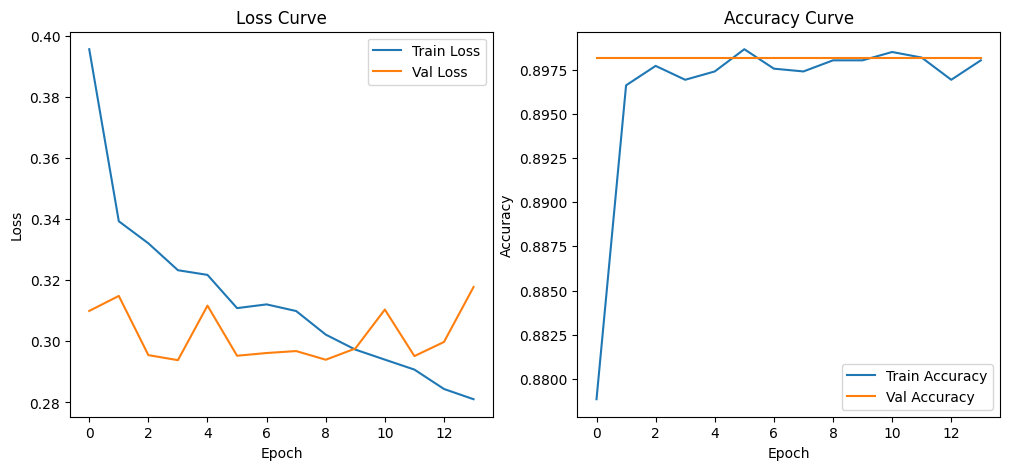

In [55]:
# Plot training loss and accuracy
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1429
           1       0.00      0.00      0.00       162

    accuracy                           0.90      1591
   macro avg       0.45      0.50      0.47      1591
weighted avg       0.81      0.90      0.85      1591



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


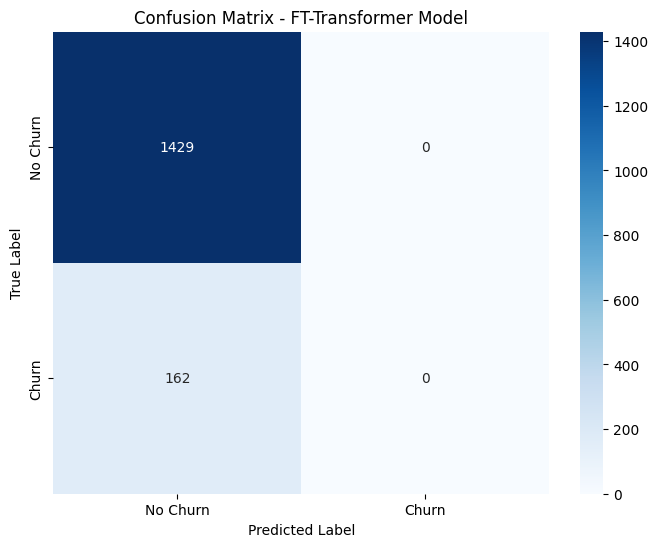

Accuracy: 0.8982

Example Predictions:
Predicted: 0 - Actual: 0
Predicted: 0 - Actual: 0
Predicted: 0 - Actual: 0
Predicted: 0 - Actual: 1
Predicted: 0 - Actual: 1


In [56]:
# ====================================================================
# Evaluate Model & Confusion Matrix
# ====================================================================

def evaluate_model(model, X_test, y_test):
    """Evaluate model performance and plot confusion matrix."""
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int).flatten()

    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.title('Confusion Matrix - FT-Transformer Model')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print("\nExample Predictions:")
    for i in range(5):  # Display first 5 predictions
        print(f"Predicted: {y_pred[i]} - Actual: {y_test.iloc[i]}")

    return accuracy

# Evaluate the FT-Transformer model
accuracy = evaluate_model(model, X_test, y_test)


In [57]:
# ====================================================================
# Save Model
# ====================================================================

def save_model(model):
    """Save the trained FT-Transformer model."""
    model.save('ft_transformer_model.h5')
    print("✓ FT-Transformer model saved")

# Save the FT-Transformer model
save_model(model)

✓ FT-Transformer model saved
